In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [26]:
df = pd.read_csv("kc_house_data.csv")

In [27]:
df.drop(columns=["id","date","zipcode"],axis=1,inplace=True)
df.drop(columns=["condition","long"],inplace=True)

In [28]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,0.280439,0.072575
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.000816,0.731870,0.194050


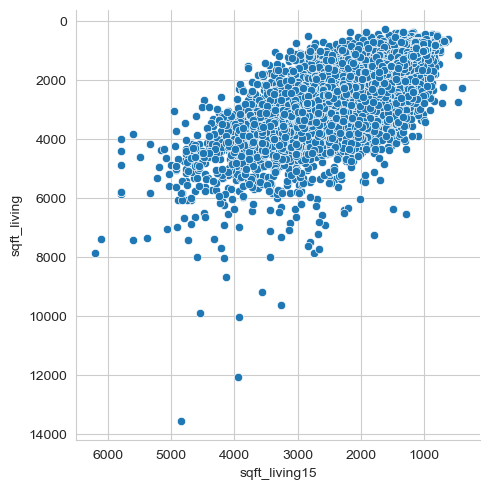

In [45]:
chart = sns.relplot(y ="sqft_living", x ="sqft_living15", data = df)
plt.ylabel("sqft_living")
plt.xlabel("sqft_living15")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [6]:
pca = PCA(n_components = 2)
X2D1 = pca.fit_transform(df[["sqft_living","sqft_living15"]])
X2D2 = pca.fit_transform(df[["sqft_lot","sqft_lot15"]])

In [7]:
df["sqft_living"] = X2D1[:,0]
df["sqft_lot"] = X2D2[:,0]

In [8]:
df.drop(columns=["sqft_living15","sqft_lot15"],axis=1,inplace=True)

In [9]:
df[df["yr_renovated"] == 0]["price"].count()

20699

In [10]:
df.drop(columns=["yr_renovated","view","waterfront"],axis=1,inplace=True)
df.drop(columns=["sqft_basement","sqft_lot"],axis=1,inplace=True)

In [11]:
X = df.drop('price',axis=1)
y = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

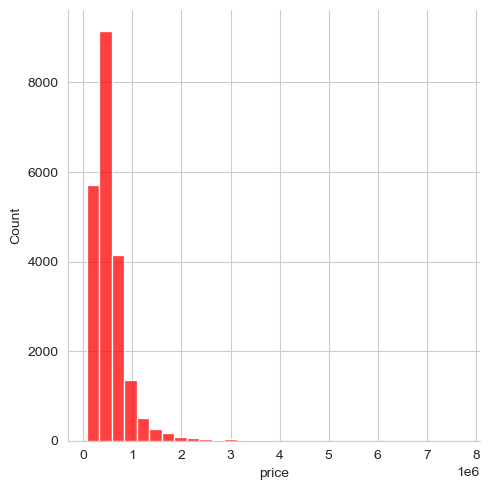

In [13]:
sns.set_style('whitegrid')
sns.displot(df['price'], kde=False,color ='red', bins = 30)

In [14]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [15]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [16]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [17]:
polyReg = LinearRegression()
polyReg.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
linPred = linReg.predict(X_test)
polyPred = polyReg.predict(X_test_poly)
print('Linear MSE : ', mean_squared_error(y_test, linPred))
print('Poly MSE : ', mean_squared_error(y_test, polyPred))

Linear MSE :  41182806166.49335
Poly MSE :  35341003439.02349


In [19]:
print('Linear MAE : ', mean_absolute_error(y_test, linPred))
print('Poly MAE : ', mean_absolute_error(y_test, polyPred))

Linear MAE :  134896.55135532084
Poly MAE :  109963.21174965372
